In [7]:
import cosmoGW.cosmology as co
import cosmoGW.plot_sets as plot_sets
import numpy as np
import astropy.units as u
import astropy.constants as const
import pandas as pd
import cosmoGW.cosmoGW as cGW

In [2]:
help(co)

Help on module cosmoGW.cosmology in cosmoGW:

NAME
    cosmoGW.cosmology

DESCRIPTION
    cosmology.py is a Python routine that contains functions relevant
    for cosmological calculations, including a solver of Friedmann equations.

    Adapted from the original cosmology in GW_turbulence
    (https://github.com/AlbertoRoper/GW_turbulence)

    Currently part of the cosmoGW code:
    https://github.com/MHDcosmoGW/cosmoGW/src/cosmoGW/cosmology.py

    Author: Alberto Roper Pol
    Created: 27/11/2022 (GW_turbulence)
    Updated: 13/03/2025 (release cosmoGW 1.0: https://pypi.org/project/cosmoGW/)

    Main references are:

    RoperPol:2018sap - A. Roper Pol, A. Brandenburg, T. Kahniashvili,
    A. Kosowsky, S. Mandal, "The timestep constraint in solving the
    gravitational wave equations sourced by hydromagnetic turbulence,"
    Geophys. Astrophys. Fluid Dynamics 114, 1, 130 (2020),
    arXiv:1807.05479.

    RoperPol:2019wvy - A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahnias

In [3]:
help(cGW)

Help on module cosmoGW.cosmoGW in cosmoGW:

NAME
    cosmoGW.cosmoGW

DESCRIPTION
    cosmoGW.py is a Python routine that contains functions relevant for
    cosmological stochastic gravitational wave backgrounds (SGWB).

    Adapted from the original cosmoGW in GW_turbulence
    (https://github.com/AlbertoRoper/GW_turbulence)

    Author: Alberto Roper Pol
    Created: 01/12/2021 (GW_turbulence)
    Updated: 13/03/2025 (release cosmoGW 1.0)

    Main references used in this library are:

    Maggiore:1999vm - M. Maggiore, "Gravitational wave experiments and
    early universe cosmology," Phys.Rept. 331 (2000) 283-367,
    arXiv:gr-qc/9909001.

    RoperPol:2018sap - A. Roper Pol, A. Brandenburg, T. Kahniashvili,
    A. Kosowsky, S. Mandal, "The timestep constraint in solving the
    gravitational wave equations sourced by hydromagnetic turbulence,"
    Geophys. Astrophys. Fluid Dynamics 114, 1, 130 (2020),
    arXiv:1807.05479.

    RoperPol:2021xnd - A. Roper Pol, S. Mandal, A. Brand

In [4]:
co.values_0(neut=False, h0=1., ret_rad=True)

(2,
 3.909090909090909,
 <Quantity 2.34863695e-10 MeV>,
 <Quantity 3.24077929e-18 Hz>,
 <Quantity 0.00026056 GeV / m3>,
 <Quantity 2.47290274e-05>)

In [8]:
TT = np.logspace(-5, 4, 1000)*u.GeV

g1 = co.thermal_g(T=TT, s=0, file=True, Neff=2.5)
g2 = co.thermal_g(T=TT, s=0, file=False, Neff=2.5)

g1s = co.thermal_g(T=TT, s=1, file=True, Neff=2.5)
g2s = co.thermal_g(T=TT, s=1, file=False, Neff=2.5)

3.135536588301195 3.135536588301195 3.590909090909091 3.590909090909091


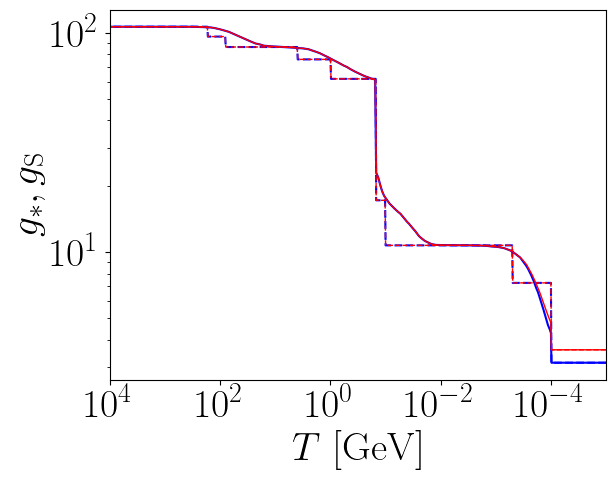

In [15]:
import matplotlib.pyplot as plt
plt.plot(TT, g1, color='blue')
plt.plot(TT, g2, color='blue', ls='dashed')
plt.plot(TT, g1s, color='red', lw=1)
plt.plot(TT, g2s, color='red', ls='dashed', lw=1)
plt.xlim(1e4, 1e-5)
#plt.ylim(0, 120)
plt.xscale('log')
plt.yscale('log')
#plot_sets.axes_lines()
plt.xticks(np.logspace(4, -4, 5))
#plt.yticks(np.linspace(0, 100, 7))
plt.xlabel(r'$T$ [GeV]')
plt.ylabel(r'$g_\ast, g_{\rm S}$')

print(g1[0], g2[0], g1s[0], g2s[0])

#plot_sets.save_fig(dirr='', name='g_vs_T')

In [7]:
co.rho_critical()

<Quantity 10.53672373 GeV / m3>

In [8]:
(co.T0K*const.k_B).to(u.MeV)

<Quantity 2.34863695e-10 MeV>

In [9]:
co.Hs_fact()

<Quantity 0.20658853 Hz / MeV2>

In [10]:
co.Hs_val(g=100, T=100*u.GeV)

<Quantity 2.06588527e+10 Hz>

In [11]:
co.as_fact(Neff=4)

<Quantity 3.89052605e-10 MeV>

In [12]:
co.as_a0_rat(g=100, T=100*u.GeV)

<Quantity 7.97090828e-16>

In [13]:
co.rho_radiation(g=100)

<Quantity 4.28172805e+56 GeV / m3>

In [14]:
co.Hs_val(g=10, T=100)

The input temperature in  Hs_val  needs to be given in energy units using astropy.units 
 setting T to default value T = 100.0 GeV


<Quantity 6.53290282e+09 Hz>

In [15]:
co.rho_critical(H=co.H0_ref)

<Quantity 10.53672373 GeV / m3>

In [21]:
T = np.logspace(-6, 6, 1000)*u.GeV
g = co.thermal_g(T=T)